### Emerging Technologies Project 2020/21
**Charlie Conneely, G00348887**
***
**Task**: Build a model based off of the `powerproduction` dataset, which can be used to predict power values based on input speed values. 

In [1]:
# Arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Parsing
import pandas as pd

# Neural networks.
import tensorflow.keras as kr

/home/charlieconneely/.asdf/installs/python/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/charlieconneely/.asdf/installs/python/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/charlieconneely/.asdf/installs/python/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtyp

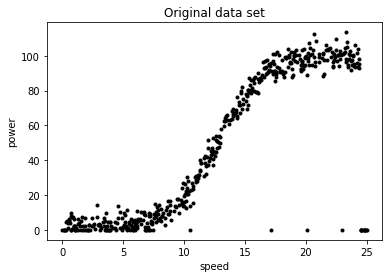

In [2]:
dataset = pd.read_csv("powerproduction.txt")

plt.title('Original data set')
plt.xlabel('speed')
plt.ylabel('power')
plt.plot(dataset.values[:,0], dataset.values[:,1], 'k.')
plt.show()

<br></br>
Below, I created a neural network with two neurons. I then trained the neural network with the data from the `powerproduction` dataset.

In [3]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation="sigmoid", kernel_initializer='ones', bias_initializer='zeros'))
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

# Train the neural network on our training data.
model.fit(dataset['speed'], dataset['power'], epochs=500, batch_size=10);

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
500/500 [==============================] - 0s 436us/sample - loss: 1614.7553
Epoch 2/500
500/500 [==============================] - 0s 151us/sample - loss: 1605.5701
Epoch 3/500
500/500 [==============================] - 0s 173us/sample - loss: 1595.9069
Epoch 4/500
500/500 [==============================] - 0s 170us/sample - loss: 1585.3019
Epoch 5/500
500/500 [==============================] - 0s 172us/sample - loss: 1571.3182
Epoch 6/500
500/500 [==============================] - 0s 178us/sample - loss: 1554.1403
Epoch 7/500
500/500 [==============================] - 0s 179us/sample - loss: 1531.9935
Epoch 8/500
500/500 [==============================] - 0s 168us/sample - loss: 1501.6167
Epoch 9/500
500/500 [==============================] - 0s 165us/sample - loss: 1457.7660
Epoch 10/500
500/500 [=========

500/500 [==============================] - 0s 161us/sample - loss: 366.8929
Epoch 83/500
500/500 [==============================] - 0s 155us/sample - loss: 364.1351
Epoch 84/500
500/500 [==============================] - 0s 193us/sample - loss: 361.8004
Epoch 85/500
500/500 [==============================] - 0s 139us/sample - loss: 359.8957
Epoch 86/500
500/500 [==============================] - 0s 180us/sample - loss: 358.4970
Epoch 87/500
500/500 [==============================] - 0s 173us/sample - loss: 356.3672
Epoch 88/500
500/500 [==============================] - 0s 201us/sample - loss: 354.6713
Epoch 89/500
500/500 [==============================] - 0s 193us/sample - loss: 352.6881
Epoch 90/500
500/500 [==============================] - 0s 174us/sample - loss: 351.2722
Epoch 91/500
500/500 [==============================] - 0s 162us/sample - loss: 349.3892
Epoch 92/500
500/500 [==============================] - 0s 150us/sample - loss: 347.9546
Epoch 93/500
500/500 [============

500/500 [==============================] - 0s 153us/sample - loss: 283.2137
Epoch 174/500
500/500 [==============================] - 0s 162us/sample - loss: 282.6422
Epoch 175/500
500/500 [==============================] - 0s 160us/sample - loss: 282.4714
Epoch 176/500
500/500 [==============================] - 0s 156us/sample - loss: 282.1641
Epoch 177/500
500/500 [==============================] - 0s 157us/sample - loss: 281.7778
Epoch 178/500
500/500 [==============================] - 0s 184us/sample - loss: 281.5527
Epoch 179/500
500/500 [==============================] - 0s 184us/sample - loss: 281.5878
Epoch 180/500
500/500 [==============================] - 0s 159us/sample - loss: 280.6695
Epoch 181/500
500/500 [==============================] - 0s 154us/sample - loss: 280.4175
Epoch 182/500
500/500 [==============================] - 0s 167us/sample - loss: 280.2358
Epoch 183/500
500/500 [==============================] - 0s 160us/sample - loss: 279.8096
Epoch 184/500
500/500 [=

500/500 [==============================] - 0s 156us/sample - loss: 265.1192
Epoch 265/500
500/500 [==============================] - 0s 155us/sample - loss: 264.9990
Epoch 266/500
500/500 [==============================] - 0s 147us/sample - loss: 264.8588
Epoch 267/500
500/500 [==============================] - 0s 179us/sample - loss: 264.8349
Epoch 268/500
500/500 [==============================] - 0s 188us/sample - loss: 264.7386
Epoch 269/500
500/500 [==============================] - 0s 165us/sample - loss: 264.6783
Epoch 270/500
500/500 [==============================] - 0s 165us/sample - loss: 264.9474
Epoch 271/500
500/500 [==============================] - 0s 170us/sample - loss: 264.6209
Epoch 272/500
500/500 [==============================] - 0s 196us/sample - loss: 264.3000
Epoch 273/500
500/500 [==============================] - 0s 166us/sample - loss: 264.3681
Epoch 274/500
500/500 [==============================] - 0s 175us/sample - loss: 264.2480
Epoch 275/500
500/500 [=

500/500 [==============================] - 0s 164us/sample - loss: 260.3072
Epoch 355/500
500/500 [==============================] - 0s 157us/sample - loss: 259.4573
Epoch 356/500
500/500 [==============================] - 0s 154us/sample - loss: 259.6391
Epoch 357/500
500/500 [==============================] - 0s 144us/sample - loss: 259.5625
Epoch 358/500
500/500 [==============================] - 0s 182us/sample - loss: 259.4776
Epoch 359/500
500/500 [==============================] - 0s 190us/sample - loss: 259.3215
Epoch 360/500
500/500 [==============================] - 0s 177us/sample - loss: 259.4515
Epoch 361/500
500/500 [==============================] - 0s 163us/sample - loss: 259.2832
Epoch 362/500
500/500 [==============================] - 0s 185us/sample - loss: 259.2010
Epoch 363/500
500/500 [==============================] - 0s 183us/sample - loss: 259.2216
Epoch 364/500
500/500 [==============================] - 0s 140us/sample - loss: 259.2452
Epoch 365/500
500/500 [=

500/500 [==============================] - 0s 153us/sample - loss: 256.6774
Epoch 446/500
500/500 [==============================] - 0s 155us/sample - loss: 256.6836
Epoch 447/500
500/500 [==============================] - 0s 148us/sample - loss: 256.8874
Epoch 448/500
500/500 [==============================] - 0s 149us/sample - loss: 256.8219
Epoch 449/500
500/500 [==============================] - 0s 186us/sample - loss: 256.6391
Epoch 450/500
500/500 [==============================] - 0s 158us/sample - loss: 256.5438
Epoch 451/500
500/500 [==============================] - 0s 161us/sample - loss: 256.5495
Epoch 452/500
500/500 [==============================] - 0s 145us/sample - loss: 256.5167
Epoch 453/500
500/500 [==============================] - 0s 163us/sample - loss: 256.5506
Epoch 454/500
500/500 [==============================] - 0s 163us/sample - loss: 256.4957
Epoch 455/500
500/500 [==============================] - 0s 156us/sample - loss: 256.4677
Epoch 456/500
500/500 [=

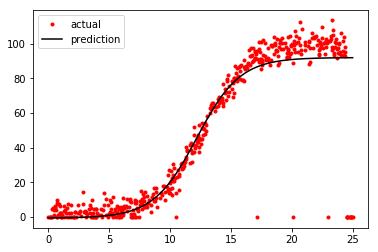

In [4]:
# Plot Model against dataset
plt.plot(dataset['speed'], dataset['power'], 'r.', label='actual')
plt.plot(dataset['speed'], model.predict(dataset['speed']), color='k', label='prediction')
plt.legend();

In [12]:
"""
Actual data - [15.591,81.239]
              [24.750, 0.000]
              [11.987,47.268]
"""
model.predict([15.591, 24.750, 11.987])

array([[80.06319],
       [91.91643],
       [42.83676]], dtype=float32)

<br></br>
The below evaluation confirms a loss of around **255.2**. <br>
This level of inaccuracy is mainly as a result of mulitple outliers (high speed values which result in a power of 0). <br>
Whether these readings represent expected output from a properly functioning wind turbine or inaccuracies is unclear. 

In [13]:
# Save model for server.py
model.save('model.h5')